In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model_cnn = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 423,722 (1.62 MB)

 Trainable params: 422,314 (1.61 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = model_cnn.fit(x_train, y_train, validation_split=0.1,
                        epochs=20, batch_size=64,
                        validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.3196 - loss: 2.1686 - val_accuracy: 0.5415 - val_loss: 1.2816
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5708 - loss: 1.1988 - val_accuracy: 0.6429 - val_loss: 0.9887
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6567 - loss: 0.9762 - val_accuracy: 0.7035 - val_loss: 0.8460
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7071 - loss: 0.8335 - val_accuracy: 0.7393 - val_loss: 0.7653
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7416 - loss: 0.7481 - val_accuracy: 0.7399 - val_loss: 0.7623
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7625 - loss: 0.6801 - val_accuracy: 0.7800 - val_loss: 0.6440
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7813 - loss: 0.6396 - val_accuracy: 0.7878 - val_loss: 0.6245
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7914 - loss: 0.6079 - val_accuracy: 

In [ ]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8354 - loss: 0.5318

Test accuracy: 82.97%


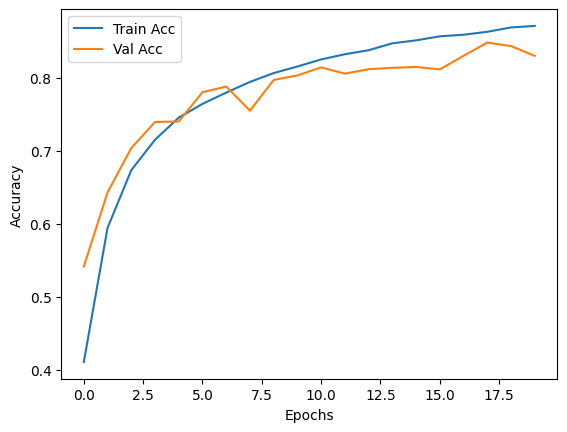

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_cnn.save('/content/drive/MyDrive/XAI/cifar10_cnn_model.h5')

In [ ]:
model_cnn.save('/content/drive/MyDrive/XAI/cifar10_cnn_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


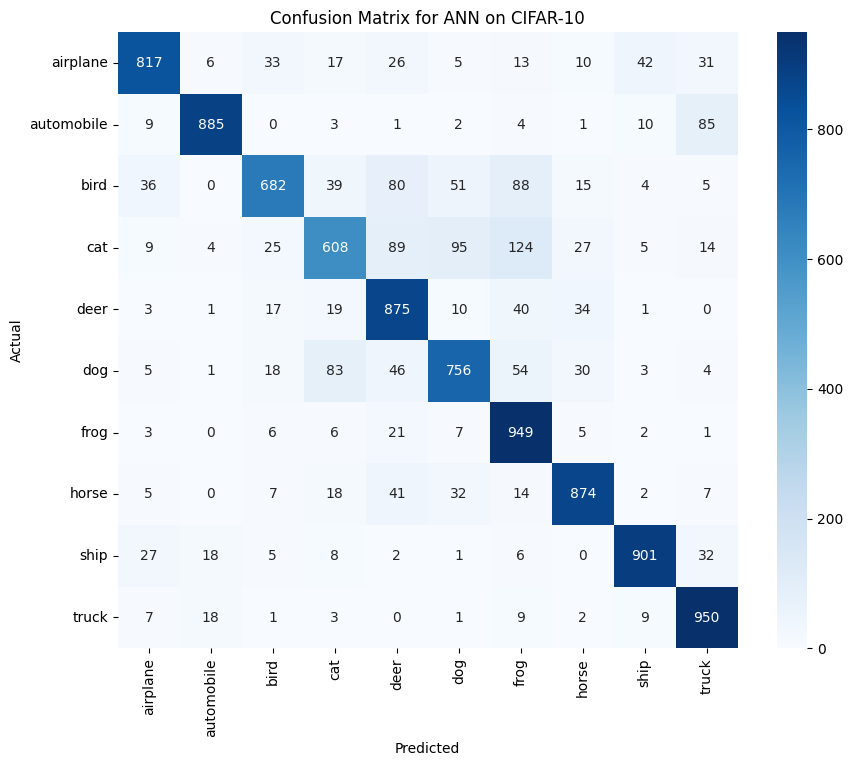


Classification Report:

              precision    recall  f1-score   support

    airplane       0.89      0.82      0.85      1000
  automobile       0.95      0.89      0.92      1000
        bird       0.86      0.68      0.76      1000
         cat       0.76      0.61      0.67      1000
        deer       0.74      0.88      0.80      1000
         dog       0.79      0.76      0.77      1000
        frog       0.73      0.95      0.82      1000
       horse       0.88      0.87      0.87      1000
        ship       0.92      0.90      0.91      1000
       truck       0.84      0.95      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred_probs = model_cnn.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten() # Corrected: y_test is already class labels, just flatten if needed for comparison

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN on CIFAR-10')
plt.show()

# Optional: print detailed metrics
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

GradCAM

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import cv2

def generate_grad_cam_heatmap(img_index):
    # Pick one image to explain
    img = x_test[img_index]
    img_array = np.expand_dims(img, axis=0)

    # 1. Identify the last convolutional layer
    last_conv_layer_name = [layer.name for layer in model_cnn.layers if isinstance(layer, tf.keras.layers.Conv2D)][-1]
    last_conv_layer = model_cnn.get_layer(last_conv_layer_name)

    # Define a new Input tensor for the Grad-CAM model
    grad_cam_input = tf.keras.Input(shape=(32, 32, 3)) # Match the input shape of model_cnn

    # Re-route the model_cnn layers through this new input to get the intermediate and final outputs
    x = grad_cam_input
    last_conv_output_from_new_input = None
    for layer in model_cnn.layers:
        x = layer(x) # Apply each layer to the current tensor 'x'
        if layer.name == last_conv_layer_name:
            last_conv_output_from_new_input = x # Capture the output of the last conv layer

    final_output_from_new_input = x # This is the final prediction from the re-routed model

    # Now construct the grad_model using these tensors
    grad_model = Model(inputs=grad_cam_input, outputs=[last_conv_output_from_new_input, final_output_from_new_input])

    # 3. Compute gradient of top predicted class w.r.t. feature maps
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        top_class_index = tf.argmax(predictions[0])
        loss = predictions[:, top_class_index]

    grads = tape.gradient(loss, conv_outputs)

    # 4. Global-average-pool the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 5. Weight the output feature maps by the pooled grads
    conv_outputs_reshaped = conv_outputs[0] # remove batch dimension
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs_reshaped), axis=-1)

    # 6. Normalize the heatmap between 0 and 1
    heatmap = np.maximum(heatmap, 0)
    if tf.math.reduce_max(heatmap) == 0: # Avoid division by zero
        heatmap = heatmap.numpy()
    else:
        heatmap /= tf.math.reduce_max(heatmap)
        heatmap = heatmap.numpy()

    heatmap = cv2.resize(heatmap, (32, 32))  # resize Grad-CAM to input image size

    # Get true and predicted labels for plotting
    true_label_index = y_test[img_index].item() if isinstance(y_test[img_index], np.ndarray) else y_test[img_index]
    true_label_name = class_names[true_label_index]
    predicted_label_name = class_names[top_class_index.numpy()]

    # 7. Display original image and overlayed Grad-CAM
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original: {true_label_name}\nPredicted: {predicted_label_name}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.title(f"Grad-CAM Overlay\nOriginal: {true_label_name}\nPredicted: {predicted_label_name}")
    plt.axis('off')
    plt.show()
    return heatmap, top_class_index.numpy()

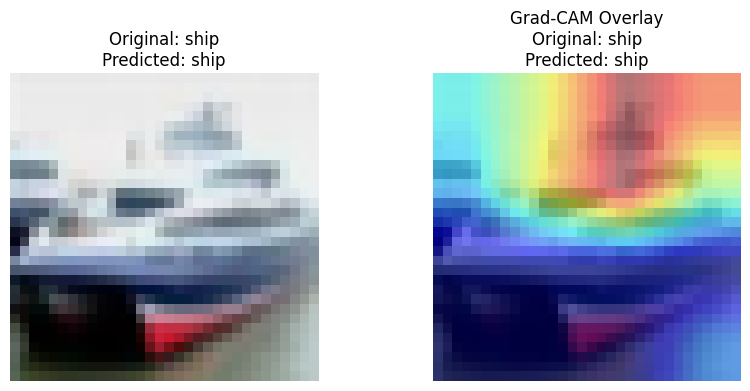

In [ ]:
generate_grad_cam_heatmap(1)

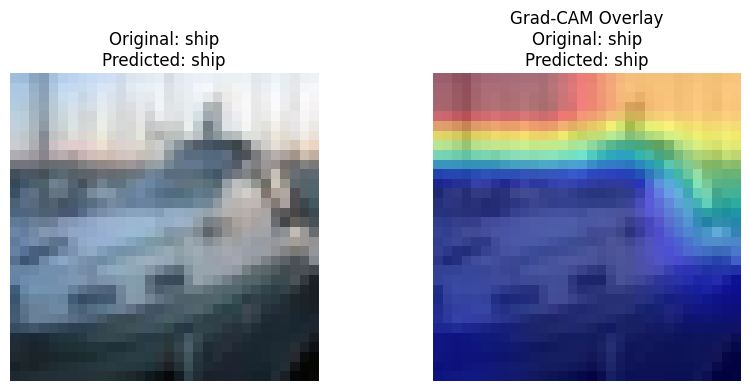

In [ ]:
generate_grad_cam_heatmap(2)

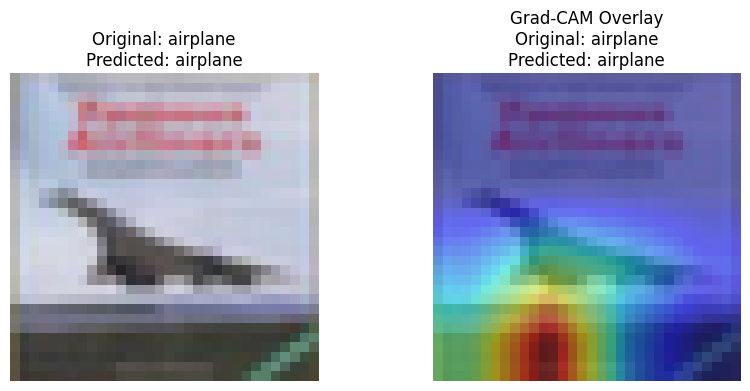

In [ ]:
generate_grad_cam_heatmap(3)

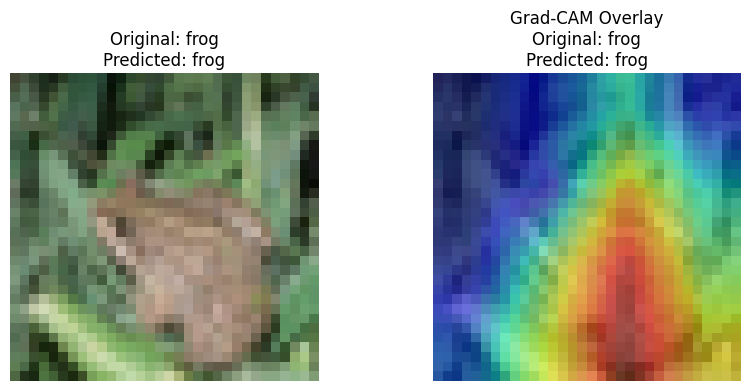

In [ ]:
generate_grad_cam_heatmap(4)

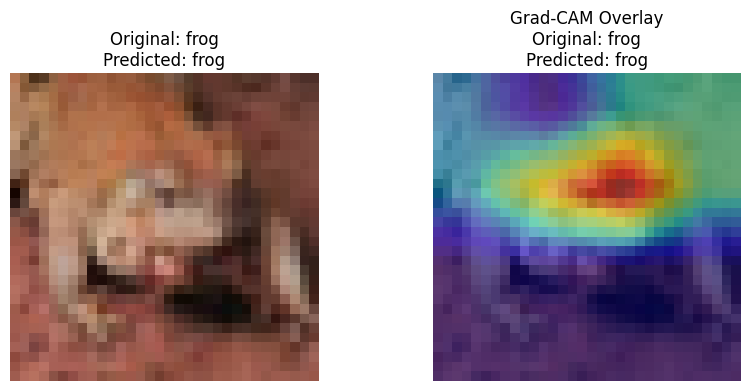

In [ ]:
generate_grad_cam_heatmap(5)

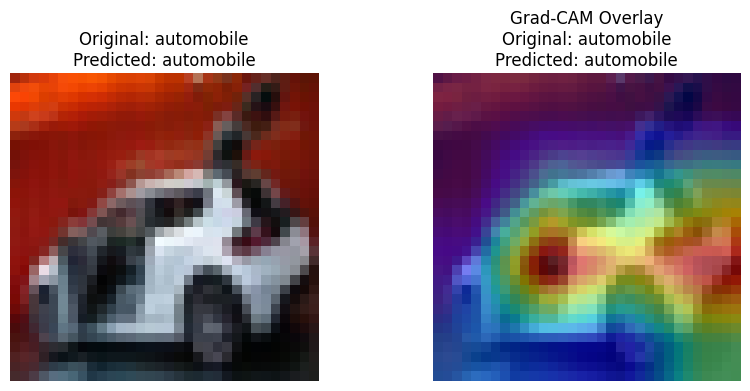

In [ ]:
generate_grad_cam_heatmap(6)

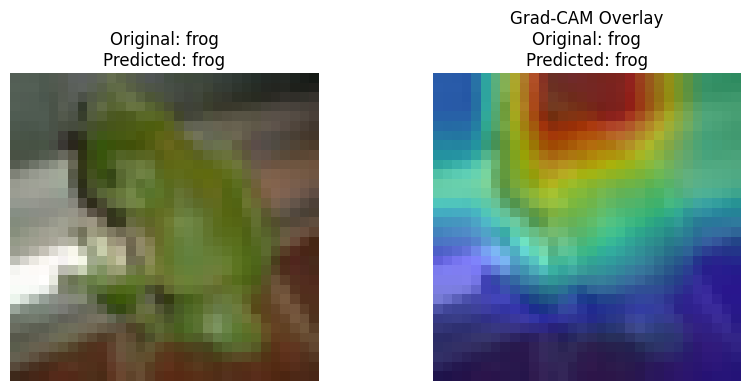

In [ ]:
generate_grad_cam_heatmap(7)

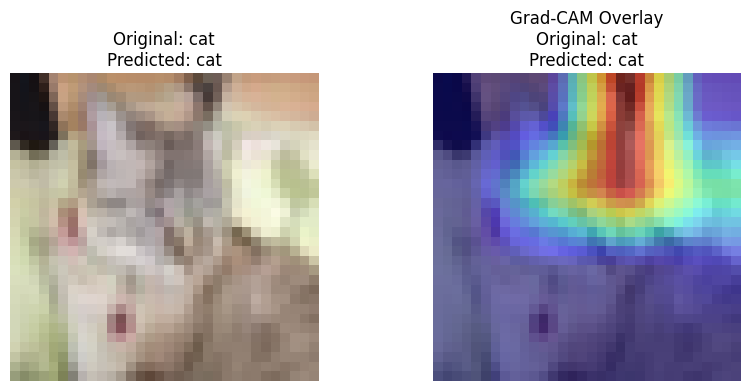

In [ ]:
generate_grad_cam_heatmap(8)

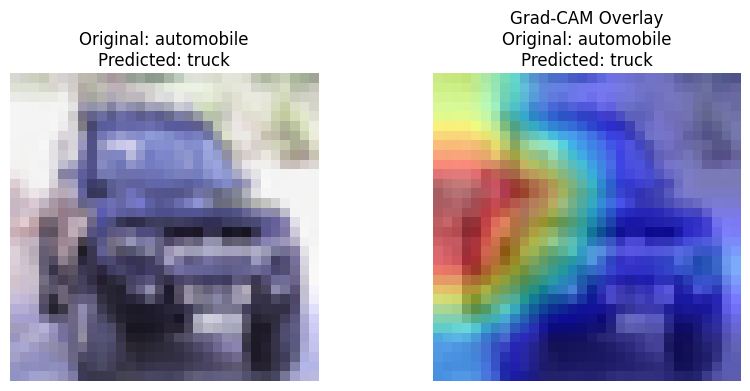

In [ ]:
generate_grad_cam_heatmap(9)

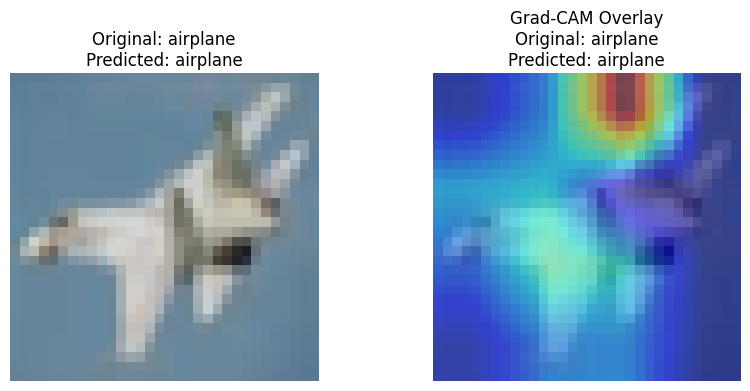

In [ ]:
generate_grad_cam_heatmap(10)

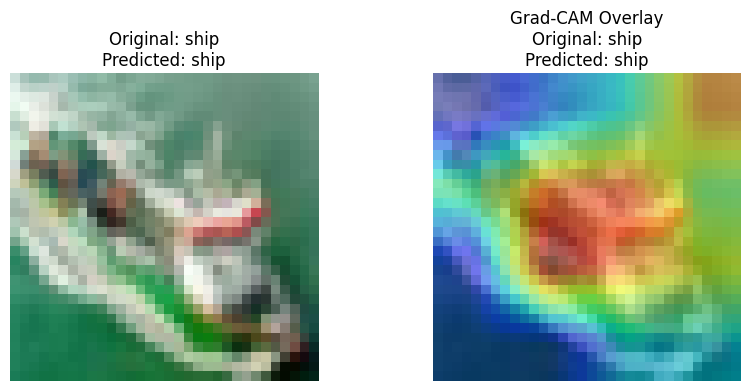

In [ ]:
generate_grad_cam_heatmap(15)

In [ ]:
!pip install lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5d1f39f50c53785ce593ff0f9cb9b4ba9d97828ed077ea2a0bc6aaa9c1c069a8
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np

# Load the CIFAR-10 dataset again to get the original image shapes
# Make sure this is only loaded once if not already loaded
if 'x_test_orig' not in globals():
    (x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()
    # Ensure the data type is correct for LIME
    x_test_orig = x_test_orig.astype('double')


def predict_fn(images):
    # Scale images to 0-1 as the model was trained on scaled data
    # and ensure the shape is correct for the CNN (batch, 32, 32, 3)
    scaled_images = images / 255.0
    preds = model_cnn.predict(scaled_images)
    return preds


def visualize_lime_explanation(image_index):
    """
    Generates and displays the LIME explanation for a given test image index.

    Args:
        image_index (int): The index of the test image to visualize.
    """
    # Ensure the image index is within the valid range
    if image_index < 0 or image_index >= len(x_test_orig):
        print(f"Error: Image index {image_index} is out of bounds.")
        return

    print(f"Generating LIME explanation for image index {image_index}...")

    explainer = lime_image.LimeImageExplainer()

    explanation = explainer.explain_instance(
        image=x_test_orig[image_index],  # Use the original image shape
        classifier_fn=predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    # Get the explanation for the top predicted label
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        hide_rest=False,
        num_features=10,
        min_weight=0.02
    )

    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 255.0, mask))

    # Get the predicted and actual labels for the image
    predicted_label = class_names[explanation.top_labels[0]]
    actual_label = class_names[y_test[image_index][0]] # y_test is 2D, need to access the inner element


    plt.title(f"LIME Explanation for Image {image_index}\nPredicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()

Generating LIME explanation for image index 3...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━

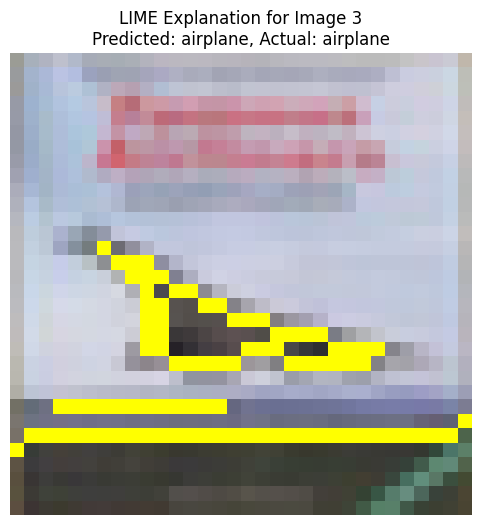

In [ ]:
visualize_lime_explanation(3)

Generating LIME explanation for image index 100...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

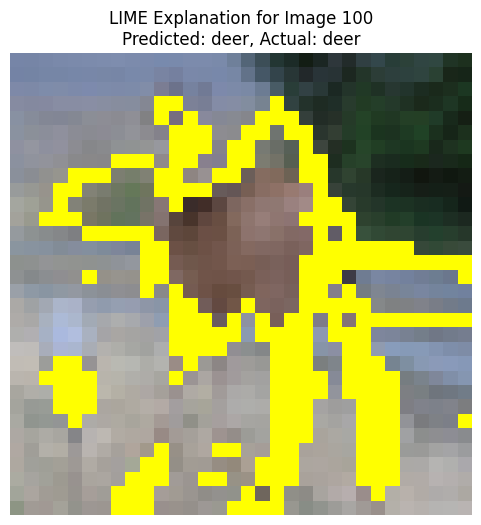

In [ ]:
visualize_lime_explanation(100)

Generating LIME explanation for image index 1...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

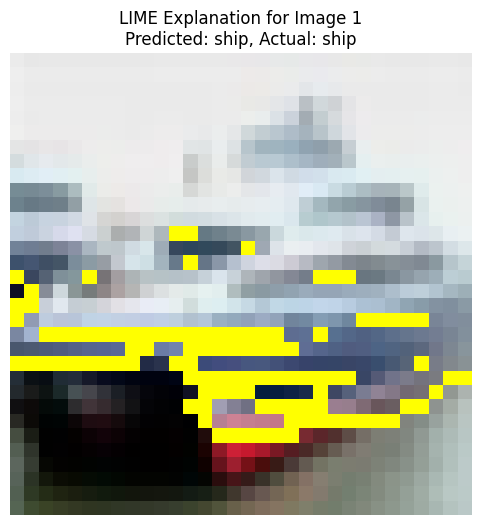

In [ ]:
visualize_lime_explanation(1)

Generating LIME explanation for image index 15...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━

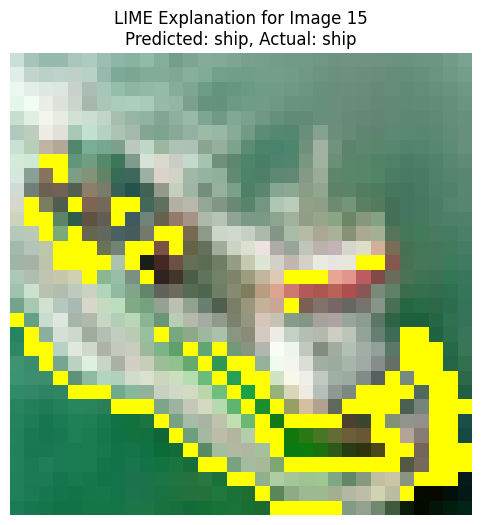

In [ ]:
visualize_lime_explanation(15)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def deletion_metric_tf(model, image, gradcam_heatmap, label_index, steps=20):
    """
    Evaluate Grad-CAM faithfulness using the Deletion Metric in TensorFlow.
    """
    # Normalize Grad-CAM
    heatmap = np.maximum(gradcam_heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-8

    h, w = heatmap.shape
    flat_indices = np.argsort(-heatmap.flatten())

    image = np.clip(image, 0, 1)
    masked_image = image.copy()

    pixels_to_remove = np.linspace(0, h*w, steps, dtype=int)
    confidences = []

    for k in pixels_to_remove:
        masked = masked_image.copy().reshape(-1, 3)
        mean_val = np.mean(masked, axis=0)
        masked[flat_indices[:k]] = mean_val
        masked = masked.reshape(h, w, 3)

        pred = model.predict(masked[np.newaxis, ...], verbose=0)
        conf = tf.nn.softmax(pred)[0][label_index].numpy()
        confidences.append(conf)

    plt.figure(figsize=(6, 4))
    plt.plot(np.linspace(0, 100, steps), confidences, marker='o')
    plt.title("Grad-CAM Deletion Metric (TensorFlow)")
    plt.xlabel("% of most important pixels removed")
    plt.ylabel("Model confidence for predicted class")
    plt.grid(True)
    plt.show()


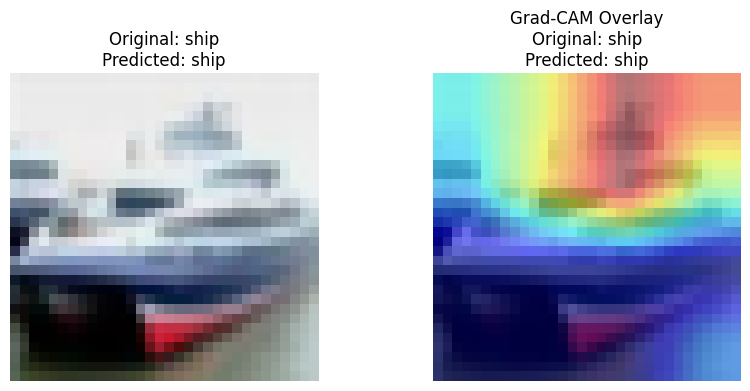

In [ ]:
gradcam_heatmap, predicted_label_index = generate_grad_cam_heatmap(1)

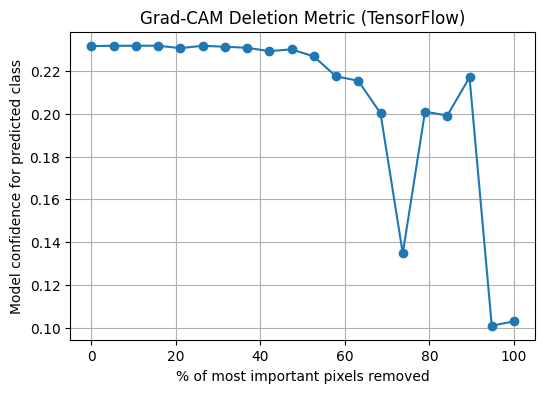

In [ ]:
deletion_metric_tf(model_cnn, x_test[1], gradcam_heatmap, label_index=predicted_label_index)

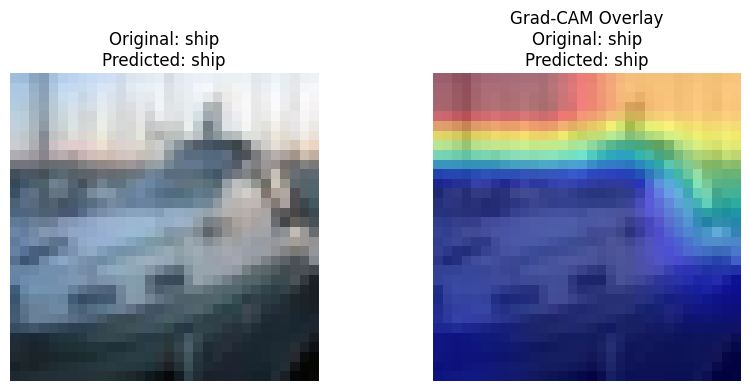

In [ ]:
gradcam_heatmap, predicted_label_index = generate_grad_cam_heatmap(2)

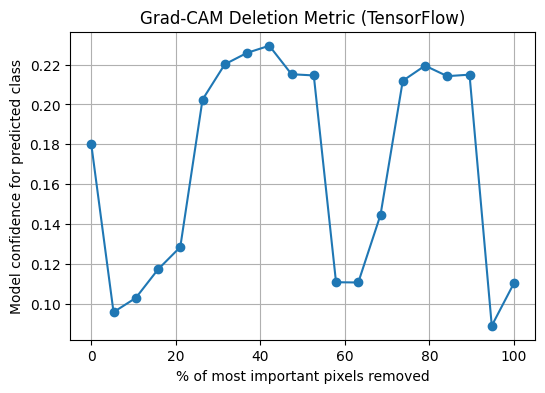

In [ ]:
deletion_metric_tf(model_cnn, x_test[2], gradcam_heatmap, label_index=predicted_label_index)